# Анализ комментариев в социальных сетях

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

В представленной задаче необходимо по тексту комментария степень его токсичности. Это задача классификации на $K$ классов, которые могут пересекаться $Y\in\{0,1\}^K$, возможные классы:
- toxic;
- severe_toxic;
- obscene;
- threat;
- insult;
- identity_hate.

Загрузим имеющиеся данные.

In [2]:
data = pd.read_csv('data/toxic_comment.csv', index_col=0)

In [3]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
data.loc['0001b41b1c6bb37e', 'comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

Проведем предварительный анализ. Для этого посмотрим на распределение классов.

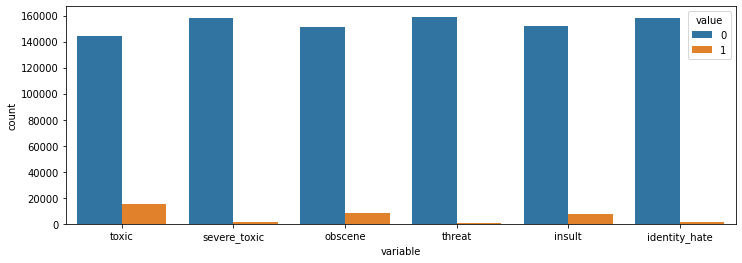

In [5]:
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(data.drop('comment_text', axis=1)))
plt.show()

Как видно из данного графика, классы несбалансированы. Это необходимо учитывать при оценке качества модели. Предварительно разобьем выборку на обучение и контроль:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['comment_text'], 
                                                    data.drop('comment_text', axis=1), 
                                                    test_size=0.33,
                                                    random_state=42)

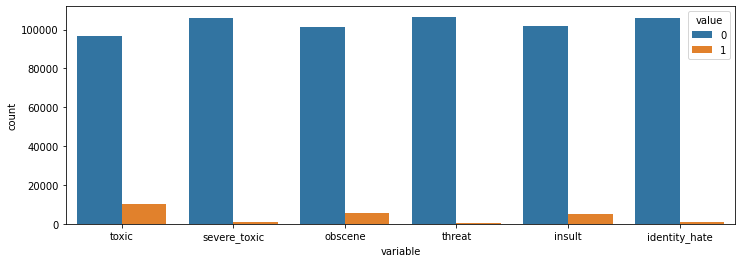

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(y_train))
plt.show()

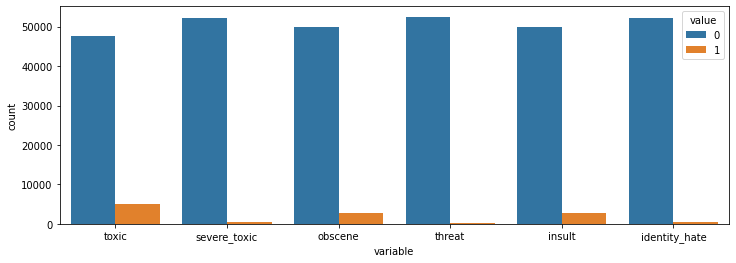

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(y_test))
plt.show()

## 1. Преобразование текстовых данных

Для преобразования текстов комментариев в числовые векторы воспользуемся методами `CountVectorizer` и `TfIdfVectorizer` из пакета `sklearn`.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Начнем с `TfidfVectorizer`. Чтобы составить корпус слов и посчитать число вхождений каждого слова в комментарии, необходимо последовательно применить функции `fit` и `transform` в `TfidfVectorizer`, или же сразу `fit_transform`.

In [11]:
tFidfVec = TfidfVectorizer(max_features=30000, sublinear_tf=True, 
                            strip_accents='unicode', analyzer='word', 
                            token_pattern=r'\w{1,}')

In [12]:
tFidfVec_train = tFidfVec.fit_transform(X_train)

In [13]:
tFidfVec_train

<106912x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 4701344 stored elements in Compressed Sparse Row format>

Таким образом `TfidfVectorizer` запоминает все слова, которые встречались в комментариях из `X_train`. Всего в корпусе оказалось 149271 слово. Теперь необходимо посчитать количество вхождений каждого из слов корпуса для тестового набора:

In [15]:
tFidfVec_test = tFidfVec.transform(X_test)

In [16]:
tFidfVec_test

<52659x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 2307197 stored elements in Compressed Sparse Row format>

## 2. Построение модели логистической регрессии

Решение задачи классификации на пересекающихся $K$ классов может быть сведено к решению $K$ задач бинарной классификации. В задачах с большим количеством признаков хорошие результаты показывают линейные модели.

<div class="alert alert-info">

<h3> Задание 1.</h3>
<p></p>

 <ol>
  <li>Решить поставленную задачу с помощью модели логистической регрессии. Для этого необходимо обучить 6 моделей на полученных векторах текстов comments_vec_train и каждом из столбцов y_train.</li>
 <p></p>

      
  <li>Для тестового набора данных comments_vec_test предсказать, принадлежит ли комментарий к каждому из 6 классов с помощью метода predict.</li>
<p></p>
  

 </ol> 
</div>

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(random_state=42, C=1)

1. toxic

In [19]:
y_train['toxic']

id
4e8d3d4418fea47e    0
46f7af1e6b292845    0
50a9e047dc52064c    0
d79990110b82ce70    0
4fc8d57b1e8f2f2a    0
                   ..
811ed72c51830f42    0
2acc7c7d0386401f    0
c1f95b89050a9ee4    1
32e8bdecfe1d66f0    0
8c6c5e4228fb6ba8    0
Name: toxic, Length: 106912, dtype: int64

In [20]:
model.fit(tFidfVec_train, y_train['toxic'])

LogisticRegression(C=1, random_state=42)

In [21]:
tFidfVec_pred1 = model.predict(tFidfVec_test)

In [22]:
sum(tFidfVec_pred1) # следовательно, единицы предсказываются

3350

In [23]:
tFidfVec_pred_proba1 = model.predict_proba(tFidfVec_test) # вероятности того, что объект относится к классу 0 и к класссу 1
tFidfVec_pred_proba1

array([[0.77957506, 0.22042494],
       [0.99043436, 0.00956564],
       [0.94280237, 0.05719763],
       ...,
       [0.99723189, 0.00276811],
       [0.99570928, 0.00429072],
       [0.9224242 , 0.0775758 ]])

2. severe_toxic

In [24]:
model.fit(tFidfVec_train, y_train['severe_toxic'])

LogisticRegression(C=1, random_state=42)

In [25]:
tFidfVec_pred2 = model.predict(tFidfVec_test)

In [26]:
sum(tFidfVec_pred2) # следовательно, единицы предсказываются

197

In [27]:
tFidfVec_pred_proba2 = model.predict_proba(tFidfVec_test) # вероятности того, что объект относится к классу 0 и к класссу 1
tFidfVec_pred_proba2

array([[9.93705376e-01, 6.29462367e-03],
       [9.98508484e-01, 1.49151578e-03],
       [9.95729286e-01, 4.27071419e-03],
       ...,
       [9.99412027e-01, 5.87973466e-04],
       [9.98526554e-01, 1.47344627e-03],
       [9.95529899e-01, 4.47010072e-03]])

3. obscene

In [28]:
model.fit(tFidfVec_train, y_train['obscene'])

LogisticRegression(C=1, random_state=42)

In [29]:
tFidfVec_pred3 = model.predict(tFidfVec_test)

In [30]:
sum(tFidfVec_pred3) # следовательно, единицы предсказываются

1867

In [31]:
tFidfVec_pred_proba3 = model.predict_proba(tFidfVec_test) # вероятности того, что объект относится к классу 0 и к класссу 1
tFidfVec_pred_proba3

array([[0.940141  , 0.059859  ],
       [0.99536711, 0.00463289],
       [0.97861807, 0.02138193],
       ...,
       [0.99804213, 0.00195787],
       [0.99576688, 0.00423312],
       [0.97625814, 0.02374186]])

4. threat

In [32]:
model.fit(tFidfVec_train, y_train['threat'])

LogisticRegression(C=1, random_state=42)

In [33]:
tFidfVec_pred4 = model.predict(tFidfVec_test)

In [34]:
sum(tFidfVec_pred4) # следовательно, единицы предсказываются

32

In [35]:
tFidfVec_pred_proba4 = model.predict_proba(tFidfVec_test) # вероятности того, что объект относится к классу 0 и к класссу 1
tFidfVec_pred_proba4

array([[9.97504650e-01, 2.49534998e-03],
       [9.98941087e-01, 1.05891319e-03],
       [9.98409110e-01, 1.59088989e-03],
       ...,
       [9.99621593e-01, 3.78406819e-04],
       [9.99047994e-01, 9.52006129e-04],
       [9.96173185e-01, 3.82681463e-03]])

5. insult	

In [36]:
model.fit(tFidfVec_train, y_train['insult'])

LogisticRegression(C=1, random_state=42)

In [37]:
tFidfVec_pred5 = model.predict(tFidfVec_test)

In [38]:
sum(tFidfVec_pred5) # следовательно, единицы предсказываются

1597

In [39]:
tFidfVec_pred_proba5 = model.predict_proba(tFidfVec_test) # вероятности того, что объект относится к классу 0 и к класссу 1
tFidfVec_pred_proba5

array([[0.87060617, 0.12939383],
       [0.99587119, 0.00412881],
       [0.97933313, 0.02066687],
       ...,
       [0.99844051, 0.00155949],
       [0.99600177, 0.00399823],
       [0.96259694, 0.03740306]])

6. identity_hate

In [40]:
model.fit(tFidfVec_train, y_train['identity_hate'])

LogisticRegression(C=1, random_state=42)

In [41]:
tFidfVec_pred6 = model.predict(tFidfVec_test)

In [42]:
sum(tFidfVec_pred6) # следовательно, единицы предсказываются

93

In [43]:
tFidfVec_pred_proba6 = model.predict_proba(tFidfVec_test) # вероятности того, что объект относится к классу 0 и к класссу 1
tFidfVec_pred_proba6

array([[9.83786090e-01, 1.62139099e-02],
       [9.98617883e-01, 1.38211710e-03],
       [9.94799283e-01, 5.20071710e-03],
       ...,
       [9.99054199e-01, 9.45800859e-04],
       [9.98074572e-01, 1.92542760e-03],
       [9.94772125e-01, 5.22787534e-03]])

## 3. Оценка качества модели

Для оценки качества каждой из моделей воспользуемся F-мерой. Оценка качества по всем 6 классам будет проводиться по следующей формуле:
$$F1=\frac{1}{6}\sum_{i=1}^6f1_i$$

<div class="alert alert-info">

<h3> Задание 2.</h3>
<p></p>

 <ol>
  <li>Оценить качество полученной модели по всем 6 классам.</li>
 <p></p>

      
  <li>Провести преобразование текста с помощью метода CountVectorizer и построить модель логистической регрессии аналогично заданию 1. Какого качества удалось достичь?</li>
<p></p>
     
  <li>Рассмотрите другие параметры Tf-Idf преобразования (lowercase, analyzer, stop_words, ngram_range, max_features) и попробуйте улучшить качество предсказаний.</li>
<p></p>
  

 </ol> 
</div>

## Пункт 1

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1 = f1_score(y_test['toxic'], tFidfVec_pred1)
f2 = f1_score(y_test['severe_toxic'], tFidfVec_pred2)
f3 = f1_score(y_test['obscene'], tFidfVec_pred3)
f4 = f1_score(y_test['threat'], tFidfVec_pred4)
f5 = f1_score(y_test['insult'], tFidfVec_pred5)
f6 = f1_score(y_test['identity_hate'], tFidfVec_pred6)
print(f1,f2,f3,f4,f5,f6)

0.7316494723111585 0.33748271092669435 0.7318007662835249 0.2608695652173913 0.6264150943396226 0.24113475177304963


In [46]:
(f1+f2+f3+f4+f5+f6)/6

0.48822539347524024

## Пункт 2

In [85]:
count_vec = CountVectorizer(max_features=30000, 
                            strip_accents='unicode', analyzer='word', 
                            token_pattern=r'\w{1,}')

In [86]:
comments_vec_train = count_vec.fit_transform(X_train)

In [87]:
comments_vec_train

<106912x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 4701344 stored elements in Compressed Sparse Row format>

Таким образом `CountVectorizer` запоминает все слова, которые встречались в комментариях из `X_train`. Всего в корпусе оказалось 149271 слово. Теперь необходимо посчитать количество вхождений каждого из слов корпуса для тестового набора:

In [88]:
comments_vec_test = count_vec.transform(X_test)

In [89]:
comments_vec_test

<52659x30000 sparse matrix of type '<class 'numpy.int64'>'
	with 2307197 stored elements in Compressed Sparse Row format>

In [90]:
model = LogisticRegression(random_state=42)

In [92]:
# toxic
model.fit(comments_vec_train, y_train['toxic'])
pred1 = model.predict(comments_vec_test)
pred_proba1 = model.predict_proba(comments_vec_test) # вероятности того, что объект относится к классу 0 и к класссу 1

# severe_toxic
model.fit(comments_vec_train, y_train['severe_toxic'])
pred2 = model.predict(comments_vec_test)
pred_proba2 = model.predict_proba(comments_vec_test) # вероятности того, что объект относится к классу 0 и к класссу 1

# obscene
model.fit(comments_vec_train, y_train['obscene'])
pred3 = model.predict(comments_vec_test)
pred_proba3 = model.predict_proba(comments_vec_test) # вероятности того, что объект относится к классу 0 и к класссу 1

# threat
model.fit(comments_vec_train, y_train['threat'])
pred4 = model.predict(comments_vec_test)
pred_proba4 = model.predict_proba(comments_vec_test) # вероятности того, что объект относится к классу 0 и к класссу 1

# insult
model.fit(comments_vec_train, y_train['insult'])
pred5 = model.predict(comments_vec_test)
pred_proba5 = model.predict_proba(comments_vec_test) # вероятности того, что объект относится к классу 0 и к класссу 1

# identity_hate
model.fit(comments_vec_train, y_train['identity_hate'])
pred6 = model.predict(comments_vec_test)
pred_proba6 = model.predict_proba(comments_vec_test) # вероятности того, что объект относится к классу 0 и к класссу 1

print(sum(pred1), sum(pred2), sum(pred3), sum(pred4), sum(pred5), sum(pred6))

c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

3975 221 2222 77 1771 188


c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
f21 = f1_score(y_test['toxic'], pred1)
f22 = f1_score(y_test['severe_toxic'], pred2)
f23 = f1_score(y_test['obscene'], pred3)
f24 = f1_score(y_test['threat'], pred4)
f25 = f1_score(y_test['insult'], pred5)
f26 = f1_score(y_test['identity_hate'], pred6)
print(f21,f22,f23,f24,f25,f26)

0.7498344005299182 0.2891566265060241 0.7583613694834752 0.27074235807860264 0.6039873130946987 0.22154779969650984


In [94]:
(f21+f22+f23+f24+f25+f26)/6

0.4822716445648714

## 4. Выбор порога округления

По умолчанию в функции `LogicticRegression` все объекты, имеющие вероятность $p>0.5$ относятся к классу 1, однако из-за дисбаланса классов многие объекты ошибочно были отнесены к классу 0. Выбрать порог округления можно самостоятельно таким образом, чтобы качество классификации по выбранной метрике было наилучшим.

<div class="alert alert-info">

<h3> Задание 3.</h3>
<p></p>

 <ol>
  С помощью метода predict_proba у LogisticRegression получить вероятности принадлежности объектов к классу 1. Выбрать порог округления для каждого из классов таким образом, чтобы F-мера была наибольшей.
<p></p>
  

 </ol> 
</div>

In [103]:
# список вероятностей
probabilityList = [0.5, 0.4, 0.3, 0.35, 0.2, 0.25]

In [98]:
tFidfVec_pred_proba1

array([[0.77957506, 0.22042494],
       [0.99043436, 0.00956564],
       [0.94280237, 0.05719763],
       ...,
       [0.99723189, 0.00276811],
       [0.99570928, 0.00429072],
       [0.9224242 , 0.0775758 ]])

In [100]:
y_test['toxic']

id
7ca72b5b9c688e9e    0
c03f72fd8f8bf54f    0
9e5b8e8fc1ff2e84    0
5332799e706665a6    0
dfa7d8f0b4366680    0
                   ..
b156c67fec7e8dcf    0
3d814930f5ca8c95    0
7c9b006f1876cf79    0
c110782d2a445a33    0
983f914b7f83f94d    0
Name: toxic, Length: 52659, dtype: int64

In [104]:
lst1 = []
for i in range(len(tFidfVec_pred_proba1)):
    if tFidfVec_pred_proba1[i,1] >= probabilityList[1]:
        lst1.append(1)
    else:
        lst1.append(0)


In [112]:
np.array(lst1)

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
tFidfVec_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
def predictOfDifferentProbability(probabilityList, tFidfVec_pred_proba):
    lst = []
    for j in probabilityList:
        l = []
        for i in range(len(tFidfVec_pred_proba1)):
            if tFidfVec_pred_proba1[i,1] >= j:
                l.append(1)
            else:
                l.append(0)
        lst.append(l)
    return np.array(lst)

In [116]:
predBest1 = predictOfDifferentProbability(probabilityList, tFidfVec_pred_proba1)
predBest1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [118]:
res = []

for i in predBest1:
    res.append(f1_score(y_test['toxic'], i))
    
res

[0.7316494723111585,
 0.7605633802816902,
 0.7781818181818182,
 0.7721614893386729,
 0.767026423520655,
 0.7783955520254169]

получаем лучший результат при p = 0.25